# 📈 Stock Data Analysis

In [1]:
import sys
import os
# Adjust the path to point to your scripts folder relative to the notebook
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

Importing Libraries

In [2]:
from scripts.data_loader import DataLoader
from scripts.preprocessing import Preprocessor
from scripts.plotting import Plotting
from scripts.text_analysis import TextAnalysis


Loading dataset

In [3]:
loader = DataLoader('/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/raw_analyst_ratings.csv')
df = loader.load_csv()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
# Display first 5 rows
df.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Display last 5 rows
df.tail(5)

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [6]:
# Check for missing values
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [7]:
# Drop unnecessary columns
loader.drop_columns(['url', 'Unnamed: 0'])

## Descriptive Statistics

Word based headline count

In [8]:
# Add headline length feature
loader.add_headline_length()

Handling Outliers

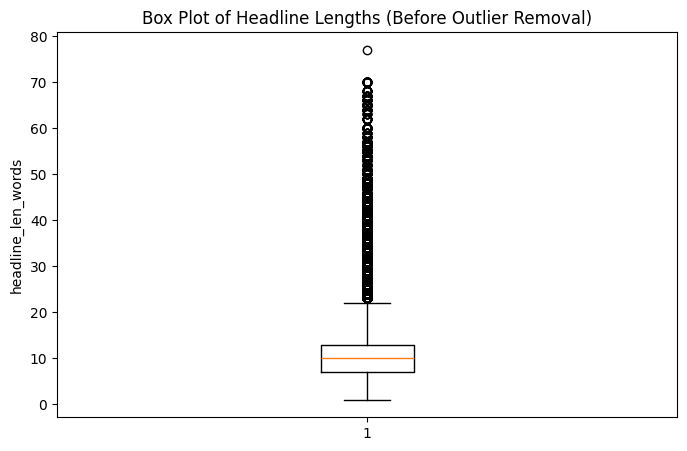

In [9]:
# Before outlier removal
Plotting.boxplot_column(loader.df, 'headline_len_words', title="Box Plot of Headline Lengths (Before Outlier Removal)")

In [11]:
df_clean = loader.remove_outliers(column='headline_len_words')

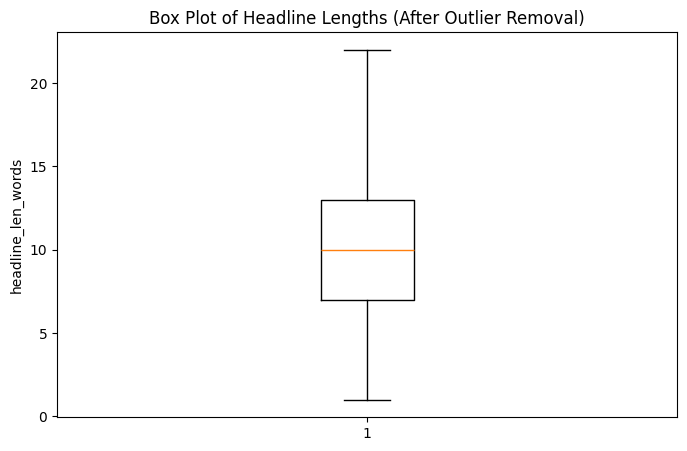

In [12]:
# After outlier removal
Plotting.boxplot_column(loader.df_clean, 'headline_len_words', title="Box Plot of Headline Lengths (After Outlier Removal)")

Stock column analysis

In [13]:
# Unique stocks
print("\nUnique Stocks:", df_clean['stock'].nunique())

# Top 10 most frequent stocks
print("\nTop 10 Stocks by Frequency:")
print(df_clean['stock'].value_counts().head(10))


Unique Stocks: 6196

Top 10 Stocks by Frequency:
stock
MRK     3086
MS      3060
EBAY    2888
M       2869
NVDA    2845
MU      2841
VZ      2800
JNJ     2728
NFLX    2727
DAL     2706
Name: count, dtype: int64


In [14]:
# Top publishers and stocks they report on
loader.parse_dates()

/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/data_loader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_clean[column] = pd.to_datetime(
/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/data_loader.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_clean[column] = self.df_clean[column].dt.tz_convert(timezone)


## Text Analysis(Topic Modeling)

Headline column preprocessing

In [15]:
#  load text analysis module
prep = Preprocessor()
plot = Plotting(df_clean)

In [16]:
# Headline column preprocessing
df_clean = prep.apply_to_dataframe(df_clean)

/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_headline'] = df[column].apply(self.preprocess_text)
/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/preprocessing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_headline_str'] = df['processed_headline'].apply(lambda x: ' '.join(x))


yearly publication counts

/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/plotting.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors="coerce")
/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/plotting.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df[date_column].dt.year


2011.0: 760 articles
2012.0: 1184 articles
2013.0: 1234 articles
2014.0: 1178 articles
2015.0: 3628 articles
2016.0: 4096 articles
2017.0: 3419 articles
2018.0: 5158 articles
2019.0: 5895 articles
2020.0: 23596 articles


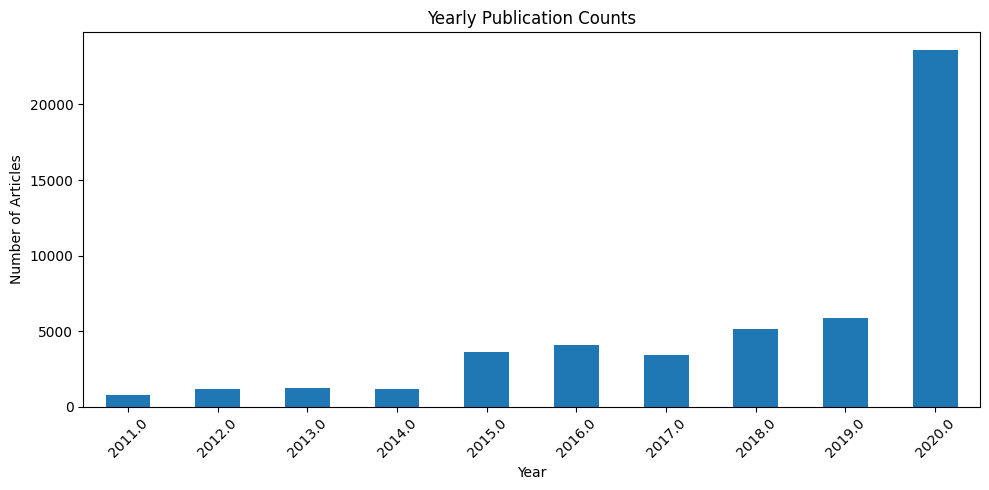

In [17]:
Plotting.plot_yearly_publication_counts(df_clean)

Weekday publication counts

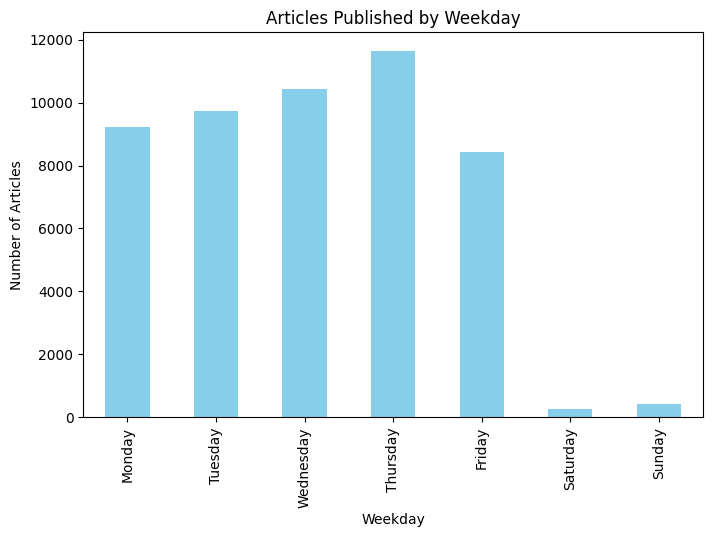

In [18]:
plot.weekday_trends()

Hourly publication count

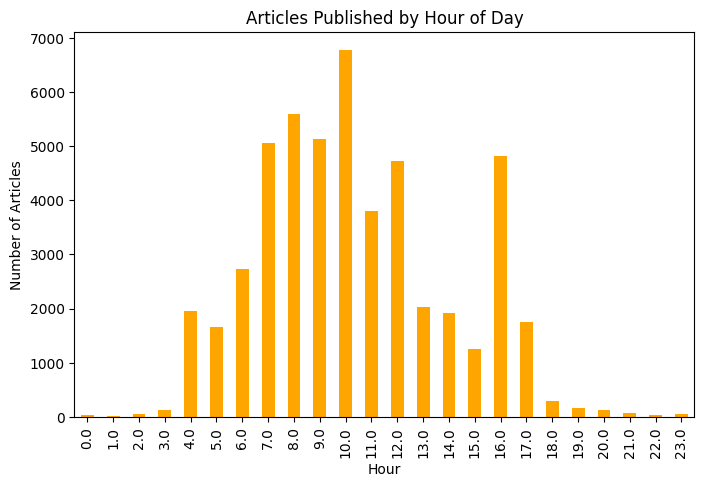

In [19]:
plot.hourly_trends()

In [20]:
ta = TextAnalysis(df_clean)

Generating top keywords

In [21]:
print("Top 20 Keywords:")
print(ta.top_keywords())

Top 20 Keywords:
[('stocks', 155285), ('vs', 151264), ('est', 130749), ('eps', 122281), ('reports', 103896), ('update', 85189), ('market', 83501), ('earnings', 80918), ('top', 77358), ('shares', 76579), ('pt', 72820), ('sales', 72368), ('announces', 64606), ('downgrades', 61509), ('buy', 61011), ('upgrades', 56442), ('raises', 56301), ('benzingas', 54828), ('price', 52288), ('maintains', 52014)]


Generating the top phrases

In [22]:
print("\nTop 20 Bigrams & Trigrams:")
print(ta.top_ngrams())


Top 20 Bigrams & Trigrams:
[('price target', np.int64(45715)), ('stocks moving', np.int64(39963)), ('market update', np.int64(33079)), ('earnings scheduled', np.int64(31843)), ('initiates coverage', np.int64(28919)), ('raises pt', np.int64(27175)), ('premarket session', np.int64(21657)), ('benzingas upgrades', np.int64(20502)), ('vs est', np.int64(20387)), ('adj eps', np.int64(20047)), ('stocks hit', np.int64(20030)), ('q1 eps', np.int64(20015)), ('hit 52week', np.int64(19964)), ('stocks hit 52week', np.int64(19903)), ('q2 eps', np.int64(19492)), ('q3 eps', np.int64(19426)), ('q4 eps', np.int64(19153)), ('new 52week', np.int64(18251)), ('biggest movers', np.int64(17795)), ('reports q4', np.int64(17113))]


## Publisher Analysis

Top publishers and stocks 

In [23]:
# Top publishers and stocks they report on
print("\nTop 5 Publishers and Their Stocks:")
print(ta.top_publishers_stocks())


Top 5 Publishers and Their Stocks:
{'Paul Quintaro': stock
XRT     522
AGN     506
JCP     504
EBAY    498
BBRY    487
JNJ     460
P       449
VZ      445
QCOM    441
MRK     440
Name: count, dtype: int64, 'Lisa Levin': stock
GPRO    523
MU      421
NVDA    357
PCG     336
CHK     311
BBBY    272
NVAX    271
ADBE    267
RH      265
BBW     265
Name: count, dtype: int64, 'Benzinga Newsdesk': stock
EWU      671
TSLA     503
FXI      456
EWW      449
RSX      431
GOOGL    379
NFLX     329
PCG      326
GOOG     312
EWC      279
Name: count, dtype: int64, 'Charles Gross': stock
GREK    622
NBG     565
BBRY    480
AZN     473
NVS     423
QCOM    414
EWU     406
EWI     400
MU      397
BABA    397
Name: count, dtype: int64, 'Monica Gerson': stock
AA      216
MS      199
GPS     198
SNDK    198
M       196
MU      195
NTAP    188
ADBE    179
DAL     176
URBN    176
Name: count, dtype: int64}


Email-like publisher names

/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/scripts/plotting.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publisher_domain'] = df['publisher'].str.extract(r'@([\w\.-]+)$')


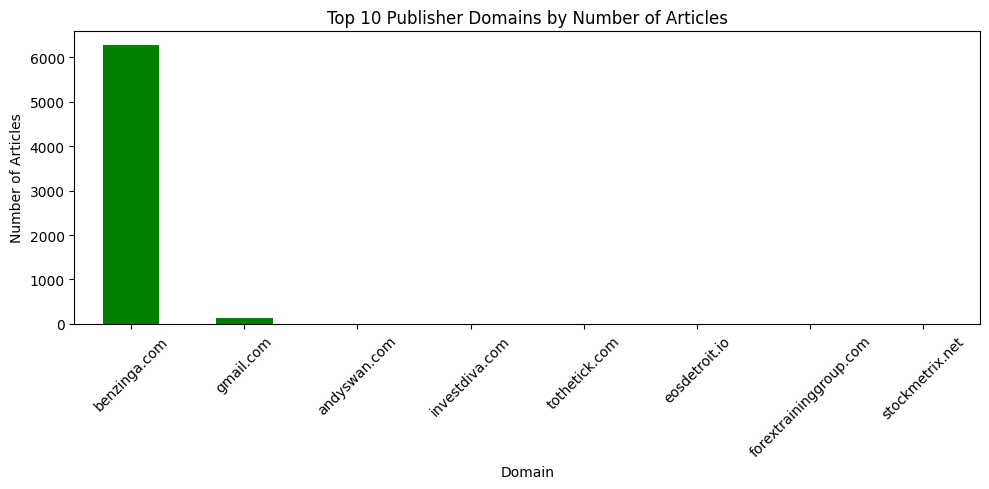

In [24]:
Plotting.plot_publisher_domains(df_clean)


Top Publishers

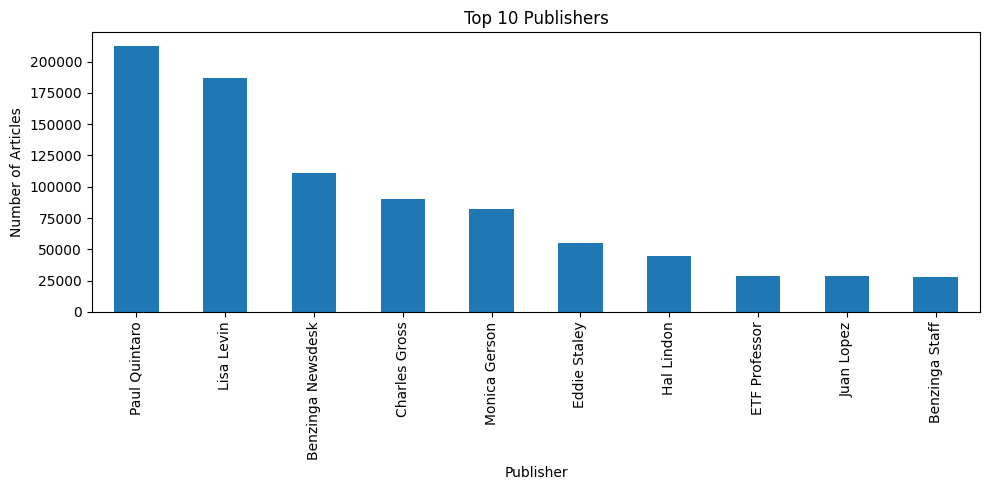

In [25]:
Plotting.plot_top_publishers(df_clean)